##<b>HOTEL BOOKING ANALYSIS<b>

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.

Explore and analyze the data to discover important factors that govern the bookings.

##We are using the following libraries:
- Numpy: We will use numpy arrays as they are comparitively faster than lists, also columns of dataframes behaves as numpy arrays

- Pandas: for reading the data from csv file, for data clening and for preparing data for analysis

- matplotlib,seabors: for different visualisations, for drawing conclusions from data and for exploratory data analysis. 

In [1]:
#required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Below we are loading the data set from the drive and creating it copy to compare to it after loading

* first we are importing drive from google.colab library
* then adding a variable to store the path of the file from the Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive') #thid is used to mount he drive

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/Almabetter/Capstone Projects/Capstone Project - 1/Hotel Bookings.csv'
data = pd.read_csv(path) #loading csv in va variable 
hotel = data.copy()

In [4]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Brief info of the process

* [Data understanding]: to understand what to do with data
*[Data cleaning] : to remove the non nun values and improve the integrity of the data
* [Data analysing and conclusion]: to visualise different patren in the data and producing useful information in the data 

In [5]:
hotel.info() # this will display the non-null values in the data and the total number of values with respect each column and their datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
hotel.describe(include=['object'])# here you can se the values in each column no of unique valuea in the column etc

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


## Data Cleaning 

* to clean the data by replacing the null-value by replacing them with appropriate values
* to elemenate outliares i.e those value that are to far appart from the rest of the data
* delete the column or rows with more than 50% of null-values
* elementaing duplicate rows 

In [7]:
print(f'the number of rows and column in data are {hotel.shape[0]}, {hotel.shape[1]}')

the number of rows and column in data are 119390, 32


In [8]:
# Now to calculate the null percentage in the data
def null_per(d):
  null_percentage = pd.Series()

  for col in d.columns:
    null_percentage[col] = f'{round(((d.shape[0]-d[col].count())/d.shape[0])*100, 5)} %'

  print(null_percentage)

In [9]:
null_per(hotel)

<ipython-input-8-3446d42061ac>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  null_percentage = pd.Series()


hotel                                  0.0 %
is_canceled                            0.0 %
lead_time                              0.0 %
arrival_date_year                      0.0 %
arrival_date_month                     0.0 %
arrival_date_week_number               0.0 %
arrival_date_day_of_month              0.0 %
stays_in_weekend_nights                0.0 %
stays_in_week_nights                   0.0 %
adults                                 0.0 %
children                           0.00335 %
babies                                 0.0 %
meal                                   0.0 %
country                            0.40874 %
market_segment                         0.0 %
distribution_channel                   0.0 %
is_repeated_guest                      0.0 %
previous_cancellations                 0.0 %
previous_bookings_not_canceled         0.0 %
reserved_room_type                     0.0 %
assigned_room_type                     0.0 %
booking_changes                        0.0 %
deposit_ty

In [10]:
# in the above table we can see that there are 3 columns with null values now elemenating the columns ans rows with 50 % null-values

# elemenating rows with 50 % null-values
hotel.dropna(axis=0, thresh=(0.5*hotel.shape[1]), inplace=True)

#elwmenating columns with 50 % null-values

hotel.dropna(axis=1, thresh=(0.5*hotel.shape[0]), inplace=True)

In [11]:
# lets calculate the null-percentage again
null_per(hotel)

hotel                                  0.0 %
is_canceled                            0.0 %
lead_time                              0.0 %
arrival_date_year                      0.0 %
arrival_date_month                     0.0 %
arrival_date_week_number               0.0 %
arrival_date_day_of_month              0.0 %
stays_in_weekend_nights                0.0 %
stays_in_week_nights                   0.0 %
adults                                 0.0 %
children                           0.00335 %
babies                                 0.0 %
meal                                   0.0 %
country                            0.40874 %
market_segment                         0.0 %
distribution_channel                   0.0 %
is_repeated_guest                      0.0 %
previous_cancellations                 0.0 %
previous_bookings_not_canceled         0.0 %
reserved_room_type                     0.0 %
assigned_room_type                     0.0 %
booking_changes                        0.0 %
deposit_ty

<ipython-input-8-3446d42061ac>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  null_percentage = pd.Series()


In [12]:
# there are still null values in the data we will fill these values with some values

#Since there are integer values in children and agents replacing null value with 0 
hotel['children'].fillna(0, inplace=True)
hotel['agent'].fillna(0, inplace=True)

#Science there are string values in the countries replacing null values with string
hotel['country'].fillna('Other', inplace=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


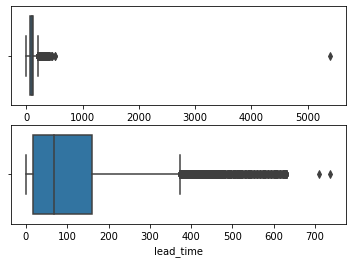

In [13]:
#checking for outliers in the average daily rate(adr) and lead_time as these are the only integer base values in the data that can have outliers

#To check for outliers we will use boxplot to check for values
plt.subplot(2, 1, 1)
sns.boxplot(hotel['adr'])

plt.subplot(2, 1, 2)
sns.boxplot(hotel['lead_time'])

In [14]:
# removing outliers in adr and lead time
col = ['adr', 'lead_time']
for i in col:
  Q1 = np.quantile(hotel[i], 0.25)
  Q3 = np.quantile(hotel[i], 0.75)
  IQR = Q3 - Q1

  #getting outliers below 25 % of the data values
  lower = np.where(hotel[i]<=Q1-1.5*IQR)
  #getting outliers above 75 % of the data values
  upper = np.where(hotel[i]>=Q3+1.5*IQR)
  
  # getting an array with all the ouliers
  out_lier = np.unique(np.append(upper[0], lower[0]))

  # removing the outliers fom the data
  hotel.index = np.arange(0, hotel.shape[0])
  hotel.drop(out_lier, inplace=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


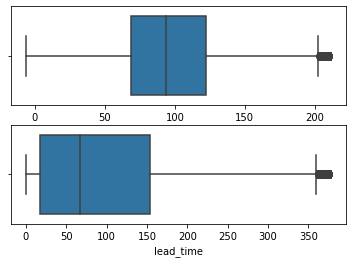

In [15]:
# checking the out liers
plt.subplot(2, 1, 1)
sns.boxplot(hotel['adr'])

plt.subplot(2, 1, 2)
sns.boxplot(hotel['lead_time'])

In [16]:
# null percentage after data cleaning
null_per(hotel)

hotel                             0.0 %
is_canceled                       0.0 %
lead_time                         0.0 %
arrival_date_year                 0.0 %
arrival_date_month                0.0 %
arrival_date_week_number          0.0 %
arrival_date_day_of_month         0.0 %
stays_in_weekend_nights           0.0 %
stays_in_week_nights              0.0 %
adults                            0.0 %
children                          0.0 %
babies                            0.0 %
meal                              0.0 %
country                           0.0 %
market_segment                    0.0 %
distribution_channel              0.0 %
is_repeated_guest                 0.0 %
previous_cancellations            0.0 %
previous_bookings_not_canceled    0.0 %
reserved_room_type                0.0 %
assigned_room_type                0.0 %
booking_changes                   0.0 %
deposit_type                      0.0 %
agent                             0.0 %
days_in_waiting_list              0.0 %


<ipython-input-8-3446d42061ac>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  null_percentage = pd.Series()


In [17]:
# ther is 0 null percentage in the data that means the data cleaning is complete
print(f'shape of data after data cleaning {hotel.shape}')

shape of data after data cleaning (112708, 31)


## EDA(Exploratory Data Analasys)

* here we compare different attributes of the data to analyse the pattern in data
* represent these different data in graphical format to get the deductiond of the pattren
* and to get useful information from the data for the benifit of the buisness or person

In [18]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [19]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112708 entries, 0 to 115596
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           112708 non-null  object 
 1   is_canceled                     112708 non-null  int64  
 2   lead_time                       112708 non-null  int64  
 3   arrival_date_year               112708 non-null  int64  
 4   arrival_date_month              112708 non-null  object 
 5   arrival_date_week_number        112708 non-null  int64  
 6   arrival_date_day_of_month       112708 non-null  int64  
 7   stays_in_weekend_nights         112708 non-null  int64  
 8   stays_in_week_nights            112708 non-null  int64  
 9   adults                          112708 non-null  int64  
 10  children                        112708 non-null  float64
 11  babies                          112708 non-null  int64  
 12  meal            

In [20]:
# checking how many number of unique hotels are there

hotel['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

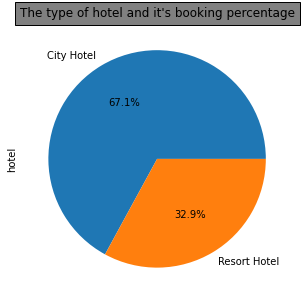

In [21]:
# there are only two type of hotel in the data lets see which type of hotel are booked more using pie chart
hotel_cnt = hotel.hotel.value_counts()
hotel_cnt.plot(kind='pie', autopct='%1.1f%%', figsize=(5, 5))
plt.title('The type of hotel and it''\'s booking percentage', bbox={'facecolor':'0.5', 'pad':5})
plt.show()

## Deduction
as we can see that city hotel is booked more then resort hotel

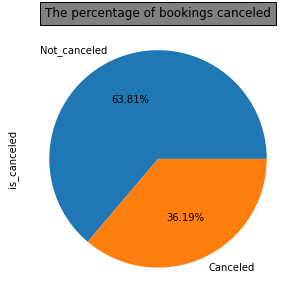

In [22]:
# lets see the cancelation percentageand i.e. to check how many percent of bookings are canceled

cancelation = hotel.is_canceled.value_counts()
cancelation.index = ['Not_canceled', 'Canceled']
cancelation.plot(kind='pie', autopct='%1.2f%%', figsize=(5 ,5))
plt.title('The percentage of bookings canceled', bbox={'facecolor':'0.5', 'pad':5})
plt.show()

## Deduction 
36.19% of bookings were canceled

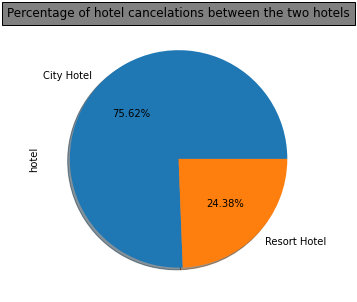

In [23]:
# lets get the hotel with max number of cancelations
hotel_with_cancelation = hotel.loc[hotel['is_canceled']==1, 'hotel'].value_counts()
hotel_with_cancelation.plot(kind='pie', autopct='%1.2f%%', figsize=(5, 5), shadow=True)
plt.title('Percentage of hotel cancelations between the two hotels', bbox={'facecolor':'0.5', 'pad':5})
plt.show()

## Deduction 

Max number of cancelations are happening in the city hotel 

In [24]:
# now calculating number of hotel bookings according to months

booking_by_months = pd.crosstab(hotel['arrival_date_month'], hotel['hotel'], )
booking_by_months = booking_by_months.reindex(['January', 'February',  'March', 'April', 'May', 'June',
                                               'July', 'August', 'September', 'October', 'November', 'December'])

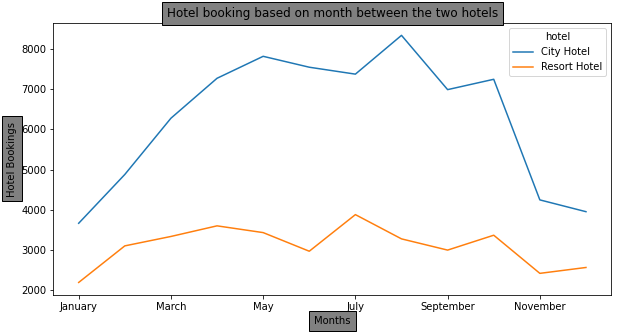

In [25]:
booking_by_months.plot(kind='line', figsize=(10, 5))
plt.ylabel('Hotel Bookings', bbox={'facecolor':'0.5', 'pad':5})
plt.xlabel('Months', bbox={'facecolor':'0.5', 'pad':5})
plt.title('Hotel booking based on month between the two hotels', bbox={'facecolor':'0.5', 'pad':5})
plt.xticks()
plt.show()

## Deduction 

* City Hotel is booked more in the month of april, august and octuber with peack in august

* Resort Hotel is booked more in the month of Februrary, april, july and october with peak in july 

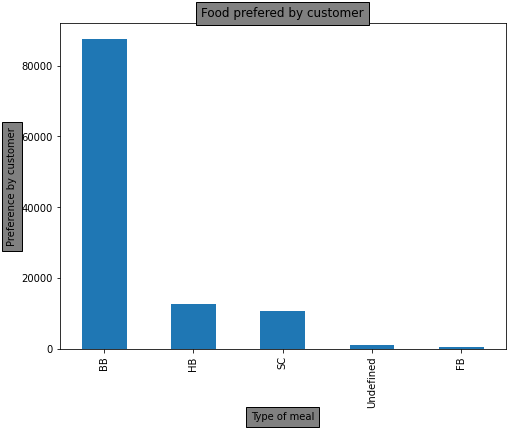

In [30]:
# Now lets see which meal does the customers preffer the most

food_pref = hotel.meal.value_counts()
food_pref.plot(kind='bar', figsize=(8, 6))
plt.ylabel("Preference by customer", bbox={'facecolor':'0.5', 'pad':5})
plt.xlabel("Type of meal", bbox={'facecolor':'0.5', 'pad':5})
plt.title("Food prefered by customer", bbox={'facecolor':'0.5', 'pad':5})
plt.show()

## Deduction 

As we can see most people prefer Bead and Breakfast in their respective hotels

In [33]:
#now  checking the adr i.e. average rental revinew made by hotels
adr_by_hotels = hotel.groupby('hotel')['adr'].mean()
adr_by_hotels

hotel
City Hotel      103.727570
Resort Hotel     84.903144
Name: adr, dtype: float64

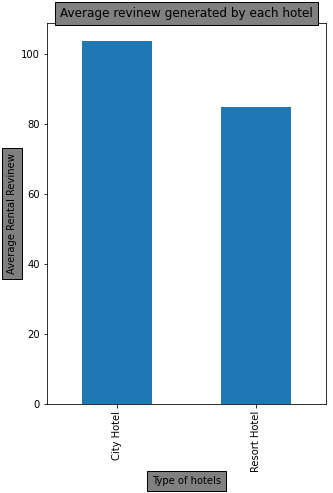

In [36]:
adr_by_hotels.plot(kind='bar', figsize=(5, 7))
plt.ylabel("Average Rental Revinew", bbox={'facecolor':'0.5', 'pad':5})
plt.xlabel("Type of hotels", bbox={'facecolor':'0.5', 'pad':5})
plt.title("Average revinew generated by each hotel", bbox={'facecolor':'0.5', 'pad':5})
plt.show()

## Deduction 
City hotel Generates more revinew Than Resort Hotel

In [43]:
hotel.country.unique().shape

(176,)

In [57]:
# lets calculate the bookings based on contry of origin
cont_origin = pd.crosstab(hotel['country'], hotel['hotel'])
cont_origin['Total Bookings'] = cont_origin['City Hotel'] + cont_origin['Resort Hotel']
cont_origin = cont_origin.sort_values(by=['Total Bookings'], ascending=False)[:14]

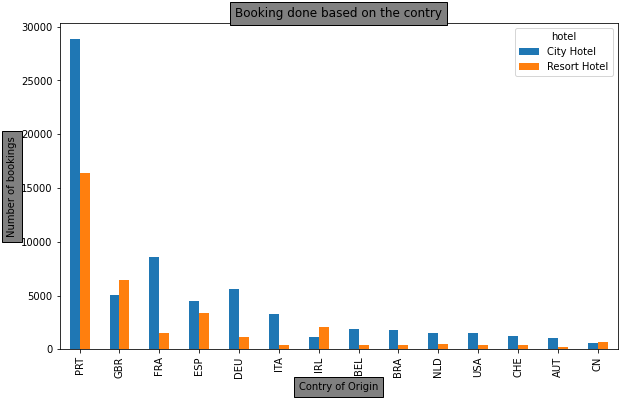

In [84]:
count_cnt = cont_origin['Total Bookings']
li = count_cnt.to_list()

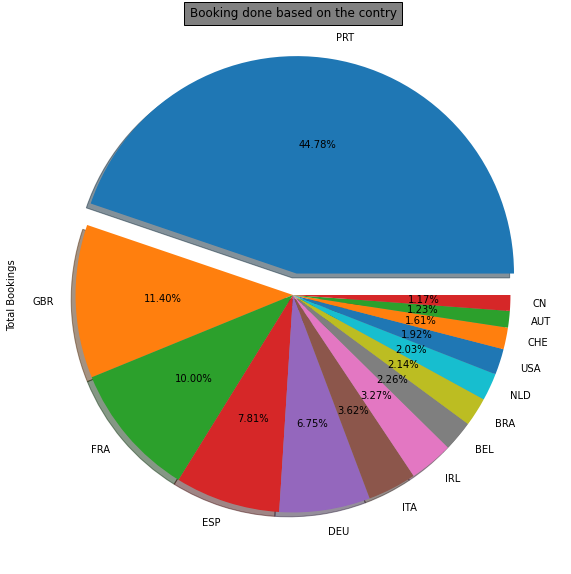

In [92]:
explode = [0.1 if i==max(li) else 0 for i in li ]
count_cnt.plot(kind='pie', y = ['Total Bookings'], figsize=(10, 10), autopct='%1.2f%%', shadow=True, explode=explode)
plt.title("Booking done based on the contry", bbox={'facecolor':'0.5', 'pad':5})
plt.show()

## Deduction 

* The Contry with maximum number of bookings is Portugal, followed by The United Kingdom and France and so on
* city Hotel and Resort hotel also recieves their maximum bookings from Portugal

In [100]:
# lets check the bookings based on Deposit type
dep_Type = hotel['deposit_type'].value_counts()

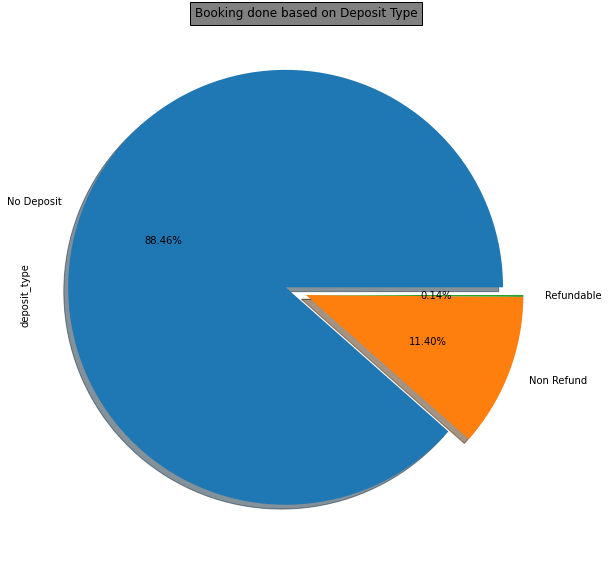

In [102]:
explode_1 = [0 if i!=max(dep_Type.to_list()) else 0.1 for i in dep_Type.to_list()]
dep_Type.plot(kind='pie', figsize=(10, 10), autopct='%1.2f%%', shadow=True, explode=explode_1)
plt.title("Booking done based on Deposit Type", bbox={'facecolor':'0.5', 'pad':5})
plt.show()

In [104]:
dep_booking = hotel.loc[hotel['deposit_type']=='No Deposit', 'hotel'].value_counts()

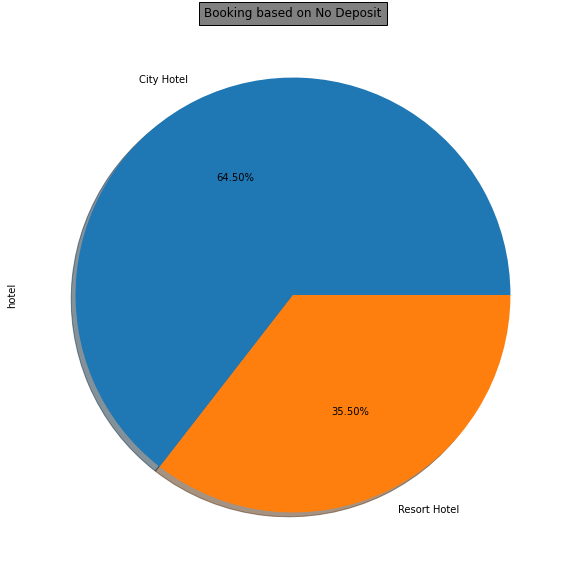

In [106]:
dep_booking.plot(kind='pie', figsize=(10, 10), autopct='%1.2f%%', shadow=True)
plt.title("Booking based on No Deposit", bbox={'facecolor':'0.5', 'pad':5})
plt.show()

## Deduction 

* 88 % of the bookings are done base on no Deposit
* from that 88 % : 64 % prefer City hotel and 35 % prefer Resort Hotel

In [107]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
